## Project Title: Data Analysis of Titanic Dataset

# Objectives:

a. What percentage of passengers survived?

b. How did survival rate vary by gender?

c. Did passengers in certain classes (Pclass) survive more?

d. Did younger passengers have a higher survival rate?

e. Does fare paid correlate with survival?

f. Does embarkation port affect survival?

g. Were passengers traveling alone or with family more likely to survive?

h. Which titles (Mr, Mrs, Miss, Master, etc.) had higher survival?

i. Did cabin information (e.g., deck) influence survival?

j. Which feature is the most important in predicting survival?


# 1. Importing all the necessary librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and reading the dataset

In [2]:
data=pd.read_csv(r"E:\Programming\Files for EDA\Titanic-Dataset.xls")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3. Data Exploration and Inspection

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 4. Data Cleaning

### 4.1 Checking for missing values

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Insights: 
* We have 177 null values for age, 687 for Cabin and 2 for Embarked. We will work on it in section 4.3 below.

### 4.2 Checking for duplicates

In [12]:
data.duplicated().any()

False

In [13]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### 4.3 Fixing missing values

#### 4.3.1 Fixing the column Age

In [14]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

C:\Users\sabin\AppData\Local\Temp\ipykernel_13244\1981374165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


#### 4.3.2 Fixing the column "Cabin"

In [15]:
data.drop('Cabin', axis=1, inplace=True)

Remark: 
* Since, the column "Cabin" has high number of missing values, its better to drop the column "Cabin" as it is insignificant to us for further analysis.

#### 4.3.3 Fixing the column "Embarked"

In [16]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data.dropna(subset=['Embarked'], inplace=True)

# 5. Exploratory Data Analysis

### 5.1 Distinguishing between Categorical and Continuous column

In [18]:
categorical_col=[]
continuous_col=[]
for col in data.columns:
    if data[col].nunique() <=10:
        categorical_col.append(col)
    else:
        continuous_col.append(col)
print('Categorical columns=', categorical_col)
print('Continuous columns=', continuous_col)



Categorical columns= ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Continuous columns= ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare']


### 5.2 What percentage of passengers survived?

In [19]:
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [20]:
data['Survived'].value_counts(normalize=True)*100  #normalize gives proportion


Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64

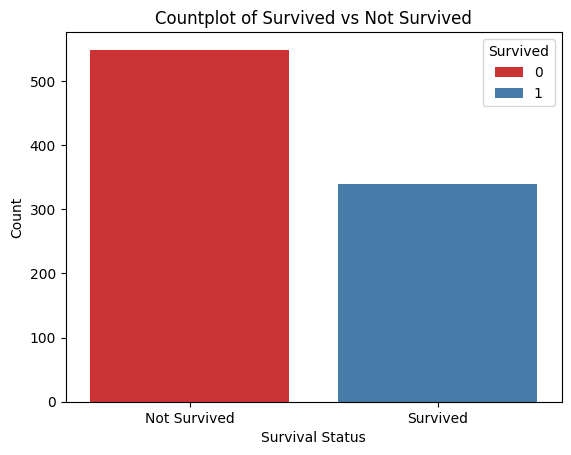

In [21]:
sns.countplot(x='Survived', data=data, hue='Survived', palette='Set1')
plt.title('Countplot of Survived vs Not Survived')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Survived', loc='upper right')
plt.show()

Insight:
* So, the survival count and rate of passenger are 340 and 38.245% respectively suggesting more deaths than survivals.

### 5.3 How did survival rate vary by gender?

In [22]:
#method-1
data.groupby('Sex')['Survived'].value_counts(normalize=True)*100

Sex     Survived
female  1           74.038462
        0           25.961538
male    0           81.109185
        1           18.890815
Name: proportion, dtype: float64

In [23]:
#method--2
Survival_by_gender= data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()* 100

In [24]:
Survival_by_gender

Survived,0,1
Sex,,
female,25.961538,74.038462
male,81.109185,18.890815


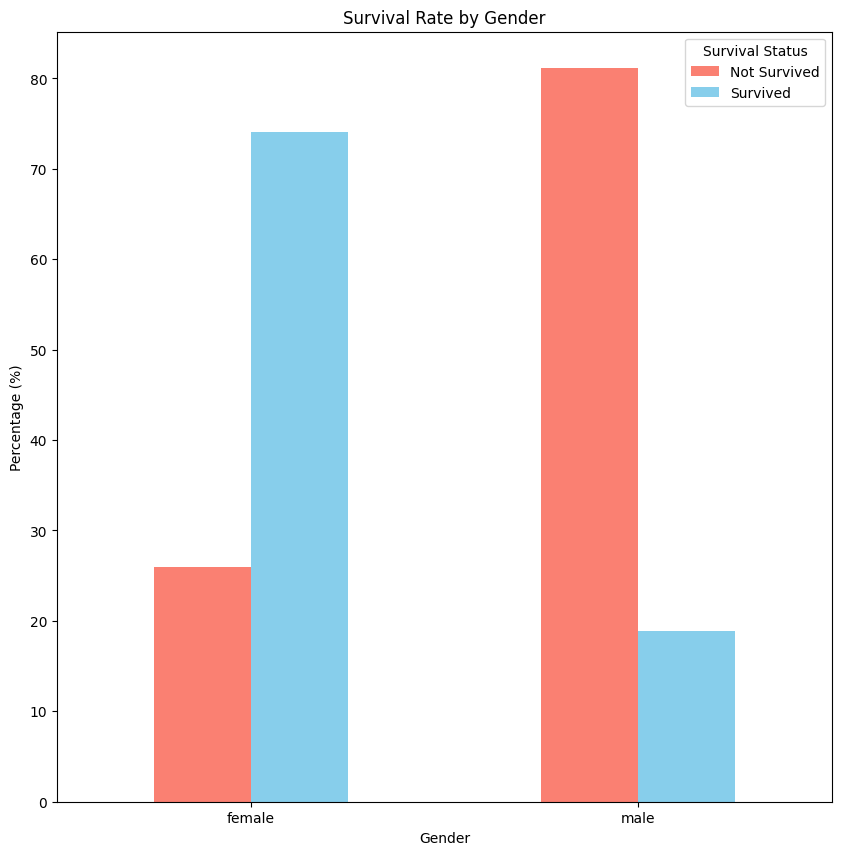

In [25]:
Survival_by_gender.plot(kind='bar', figsize=(10,10), stacked=False, color=['salmon', 'skyblue'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['female', 'male'], rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()

Insight:
* The survival rate of female passenger(74.038%) is higher than the male passenger(18.89%).

### 5.3  Did passengers in certain classes (Pclass) survive more?

In [26]:
Survival_by_Pclass= data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()*100

In [27]:
Survival_by_Pclass

Survived,0,1
Pclass,,
1,37.383178,62.616822
2,52.717391,47.282609
3,75.763747,24.236253


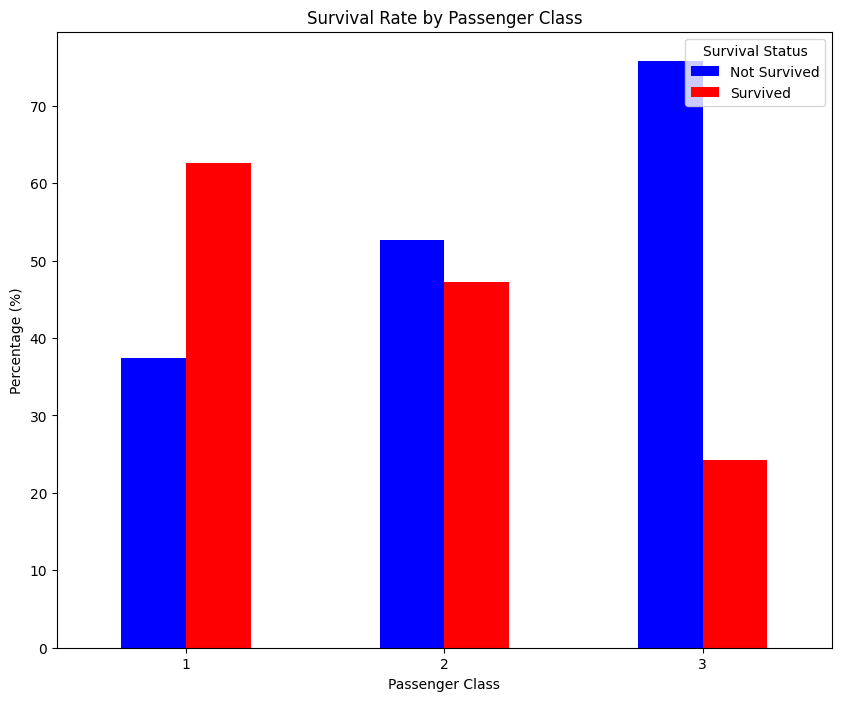

In [28]:
Survival_by_Pclass.plot(kind='bar', figsize=(10,8), stacked=False, color=['Blue', 'Red'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.show()

Insights:
* The survival rate of Passenger Class 1 was the highest with 62.61% while the passenger at class 3 survived the least with 24.236%.

### 5.4 Did younger passengers have a higher survival rate?

In [29]:
#Categorizing the 'Age' column into groups
def age_group(age):
    if age <= 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

data['AgeGroup'] = data['Age'].apply(age_group)


In [30]:
#Or the same categorization can be done using pd.cut
#bins = [0, 30, 60, 100]
#labels = ['Young', 'Middle-aged', 'Senior']
#data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)


In [31]:
data['AgeGroup'].value_counts()

AgeGroup
Young          586
Middle-aged    278
Senior          25
Name: count, dtype: int64

In [32]:
Survival_of_Young_Age= data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack() * 100
Survival_of_Young_Age

Survived,0,1
AgeGroup,,
Middle-aged,58.273381,41.726619
Senior,76.000000,24.000000
Young,62.798635,37.201365


<Figure size 1000x1000 with 0 Axes>

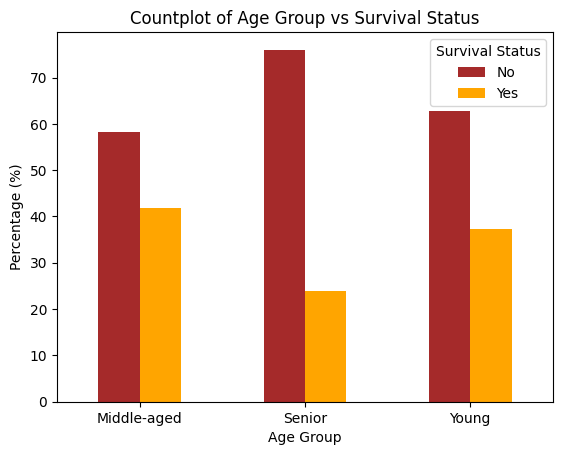

In [33]:
plt.figure(figsize=(10,10))
Survival_of_Young_Age.plot(kind='bar', stacked=False, color=['Brown', 'orange'])
plt.title('Countplot of Age Group vs Survival Status')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'], title='Survival Status', loc='upper right')
plt.show()

Insights:
* The number of young people (aged 0-30) onboard accounts to 586, while the number of middle-aged people (aged 31-59) and seniors (60+ aged) were 278 and 25 respectively.
* The survival rate of middle-aged people was the highest with 41.726%, followed by younger people with 37.201%.
* The senior citizens survived the least(24%).

### 5.5 Does fare paid correlate with survival?

In [34]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64

In [35]:
data['Fare'].max()

512.3292

In [36]:
data['Fare'].min()

0.0

In [37]:
bins = [0, 13, 26, 39, 52, 65]
labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
data['FareGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

In [38]:
data['FareGroup'].value_counts()

FareGroup
Normal       408
Low          248
High         112
Very Low      71
Very High     42
Name: count, dtype: int64

In [39]:
Survival_by_Fare= data.groupby('FareGroup')['Survived'].value_counts(normalize=True).unstack()* 100
Survival_by_Fare

C:\Users\sabin\AppData\Local\Temp\ipykernel_13244\2679741400.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Survival_by_Fare= data.groupby('FareGroup')['Survived'].value_counts(normalize=True).unstack()* 100


Survived,0,1
FareGroup,,
Very Low,40.845070,59.154930
Low,64.516129,35.483871
Normal,63.235294,36.764706
High,60.714286,39.285714
Very High,64.285714,35.714286


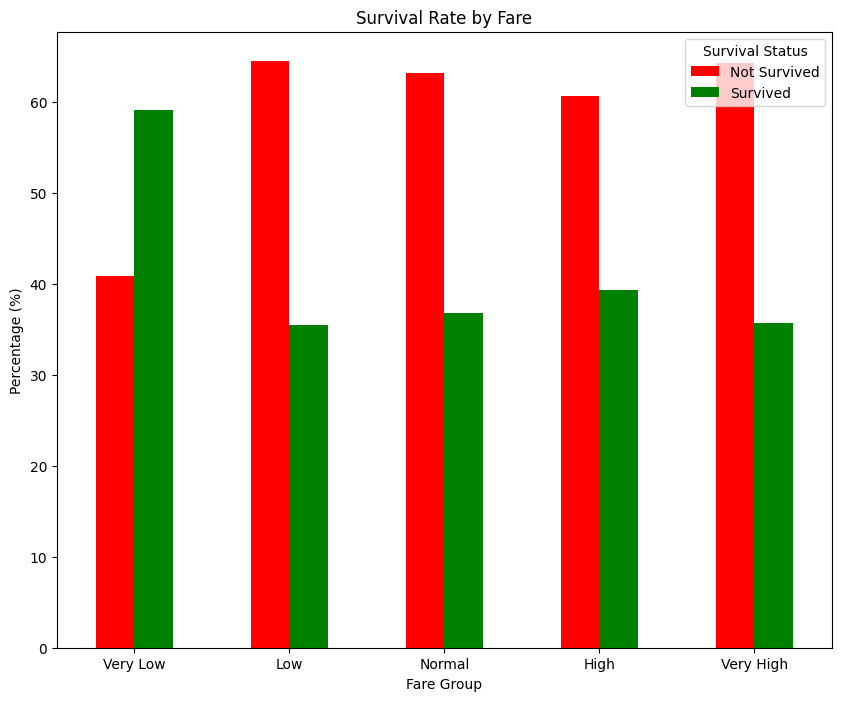

In [40]:
Survival_by_Fare.plot(kind='bar', figsize=(10,8), stacked=False, color=['Red', 'Green'])
plt.title('Survival Rate by Fare')
plt.xlabel('Fare Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.show()

Insights:
* The maximum fare was 65.
* The fare column was further grouped into 5 categories as very low, low, normal, high and very high.
* The survival rate with very low fare was the highest with 59.15%, followed by high(39.28%), normal(36.76%) and vey high(35.71%). The passenger who are in the category of low fare-group survived the least with 35.48% while the survival rate differs with only few margins among the category normal, very high and low fare-group

### 5.6 Does embarkation port affect survival?

In [41]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
Survival_by_Emabarkation = data.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()*100
Survival_by_Emabarkation

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


<Figure size 1000x800 with 0 Axes>

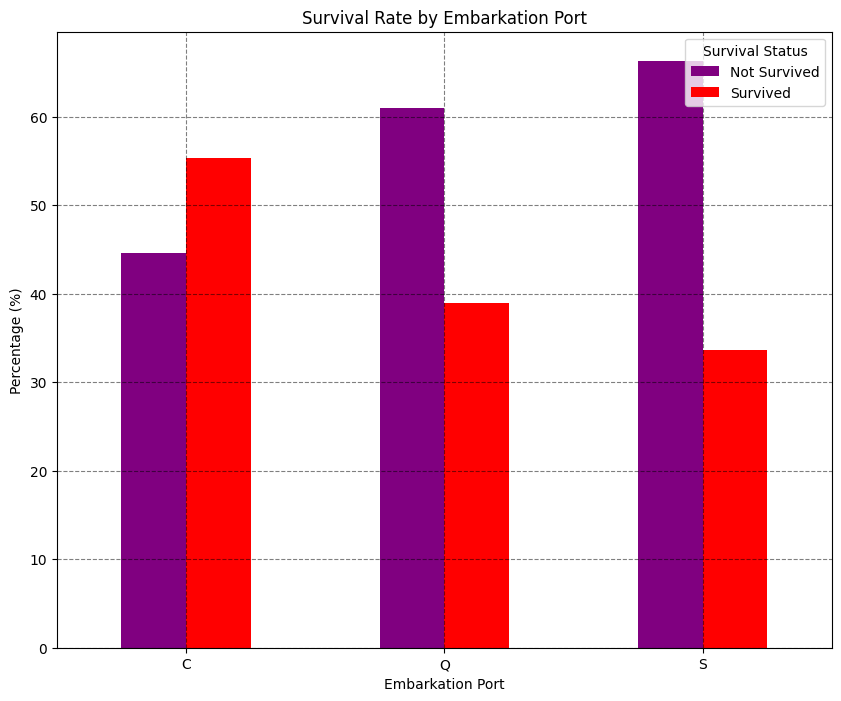

In [43]:
plt.figure(figsize=(10,8))
Survival_by_Emabarkation.plot(kind='bar', figsize=(10,8), stacked=False, color=['Purple', 'Red'])
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.grid(True, linestyle='--', color='black', alpha=0.5)
plt.show()

Insights:
* The above analysis shows that passenger embarked from three different ports like S, C and Q
* The passenger embarking from port 'S' were the highest with 644, followed by 'C' with 168 passengers and 'Q' with the least passenger- 77 people.
* The survival rate was high for the passenger on boarding from port 'C' with the percentage of 55.357% while the death rate was high for port 'S' with 66.3%.
* For port 'Q', the death rate was higher than the survival rate.

### 5.7 Were passengers traveling alone or with family more likely to survive?

NOTE: 

The Titanic dataset has these two columns:

* SibSp: Number of siblings/spouses aboard.

* Parch: Number of parents/children aboard.

In [44]:
data['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [45]:
data['Parch'].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [46]:
#Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch']
data['FamilySize'].value_counts()

FamilySize
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [47]:
# Creating a new feature 'Alone' to indicate if a passenger is traveling alone
# If FamilySize is 0, then the passenger is alone, otherwise not
data['Alone'] = data['FamilySize'].apply(lambda x: 1 if x == 0 else 0)
data['Alone'].value_counts()

Alone
1    535
0    354
Name: count, dtype: int64

In [48]:
# Making it more interpretable by assigning labels
data['TravelAlone'] = data['Alone'].map({1: 'Alone', 0: 'With Family'})
data['TravelAlone'].value_counts()

TravelAlone
Alone          535
With Family    354
Name: count, dtype: int64

In [49]:
Survival_by_Size= data.groupby('TravelAlone')['Survived'].value_counts(normalize=True).unstack() * 100
Survival_by_Size

Survived,0,1
TravelAlone,,
Alone,69.906542,30.093458
With Family,49.435028,50.564972


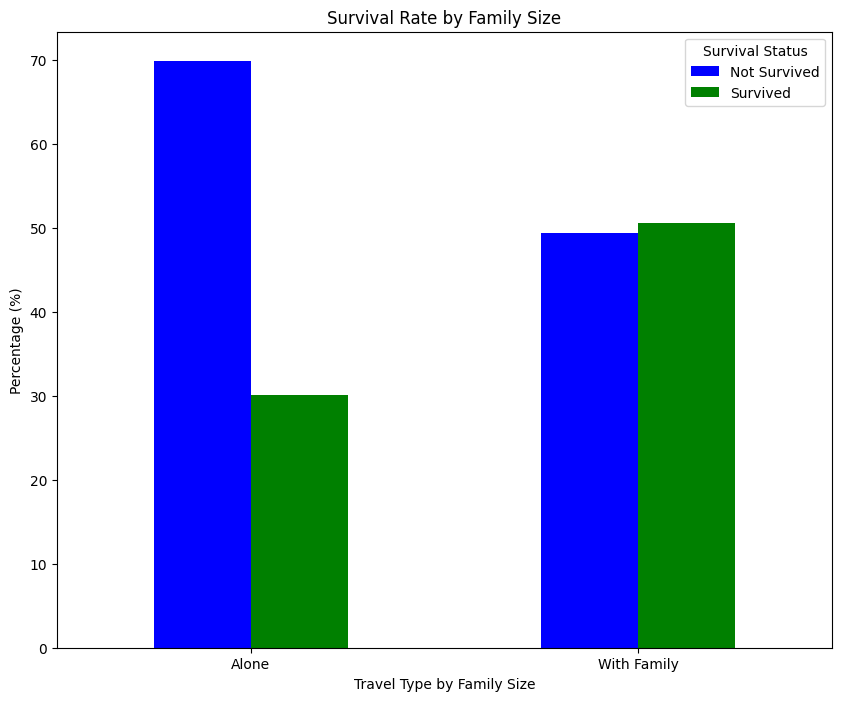

In [50]:
Survival_by_Size.plot(kind='bar', figsize=(10,8), stacked=False, color=['Blue', 'Green'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Travel Type by Family Size')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.show()

Insights:
* The passenger who onboarded Titanic were categorized into 'Alone' accounting for 535 passengers while 'With Famliy' accounted for 354.
* The passenger who travelled alone has the highest death rate than the passemger travelling with their family/ siblings.

### 5.8 Which titles (Mr, Mrs, Miss, Master, etc.) had higher survival?

In [51]:
#Extracting the title from the 'Name' column
data['Title'] = data['Name'].astype(str).str.extract(r',\s*([^\.]+)\.', expand=False)
data['Title'].value_counts()


Title
Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [52]:
# Mapping titles to more general categories
data['Title'] = data['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Clergy',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Jonkheer': 'Royalty',
    'Dona': 'Royalty'
})

In [53]:
Survival_by_title= data.groupby('Title')['Survived'].value_counts(normalize=True).unstack() * 100
Survival_by_title

Survived,0,1
Title,,
Clergy,100.000000,NaN
Master,42.500000,57.500000
Miss,29.891304,70.108696
Mr,84.332689,15.667311
Mrs,20.800000,79.200000
Officer,58.333333,41.666667
Royalty,50.000000,50.000000
the Countess,NaN,100.000000


Remark: No need to worry about the missing value because its euivalent to 0 %

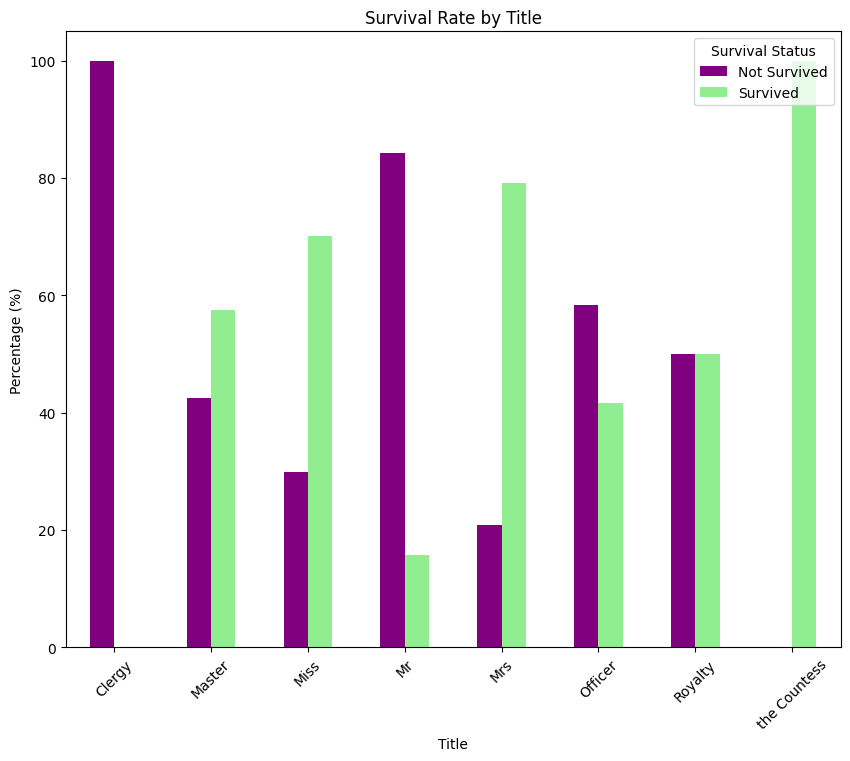

In [54]:
Survival_by_title.plot(kind='bar', figsize=(10,8), stacked=False, color=['Purple', 'LightGreen'])
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Not Survived', 'Survived'], title='Survival Status', loc='upper right')
plt.show()

Insights:
* The prefixes from the 'Name' column were extracted and categorized into more general categories like Mr, Mrs, Clergy, Master, Miss, Officers, Royalty and the Countess.
*Among them, the death rate of Clergy was the highest with no survival at all, while the Countess was the highest one to survive without any loss.

### 5.9 Did cabin information (e.g., deck) influence survival?

Insights = The column "Cabin" has a lot of missing values, so it is dropped. Therefore, it is not used in the analysis.

### 5.10 Which feature is the most important in predicting survival?

Columns like 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare', and 'Ticket' are the most relevant features for predicting survival on the Titanic.

# 6. Encoding Categorical Variables

In [55]:
categorical_col

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [56]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Name'] = lb.fit_transform(data['Name'])
data['Ticket'] = lb.fit_transform(data['Ticket'])
data['Embarked'] = lb.fit_transform(data['Embarked'])
data['Sex'] = lb.fit_transform(data['Sex'])

In [57]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name              int32
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Ticket            int32
Fare            float64
Embarked          int32
AgeGroup         object
FareGroup      category
FamilySize        int64
Alone             int64
TravelAlone      object
Title            object
dtype: object

Insights:
* We used label encoder to encode the categorical variables which will make the model training easier in later phases.

# 7. Checking and Removing Outliers

In [58]:
continuous_col

['PassengerId', 'Name', 'Age', 'Ticket', 'Fare']

In [59]:
categorical_col

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

### 7.1 Checking Outliers in Continuous Columns

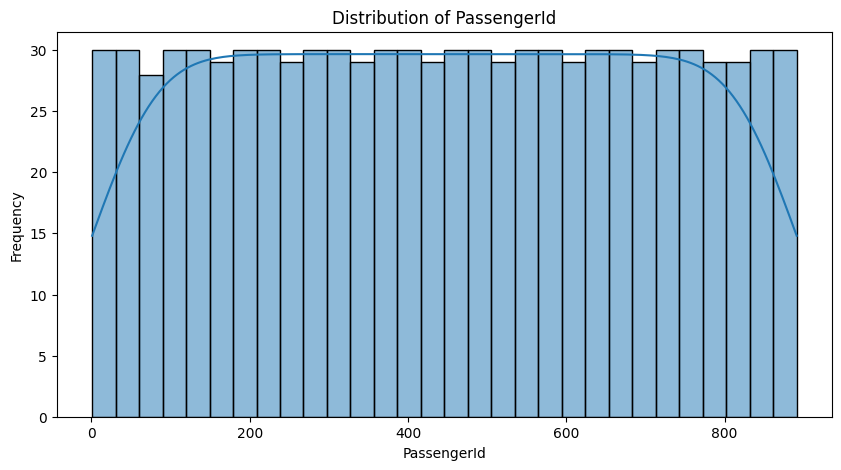

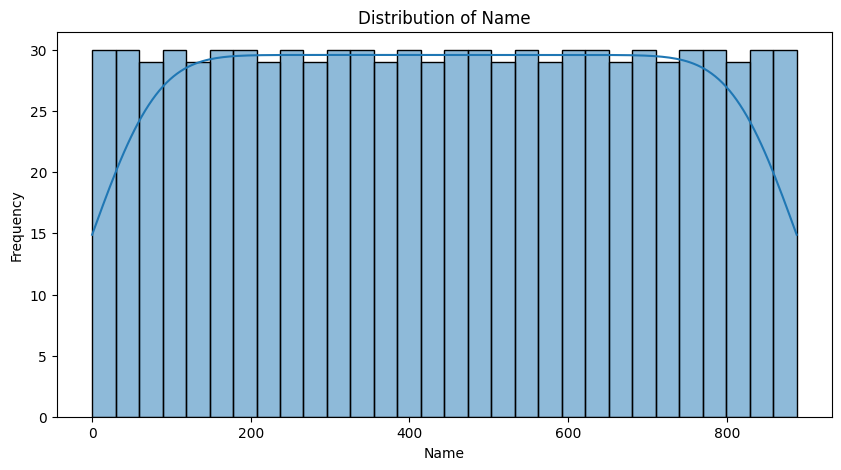

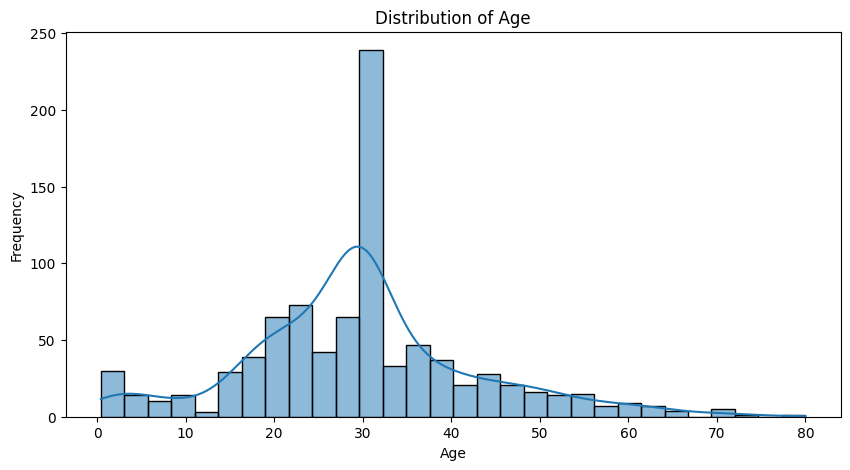

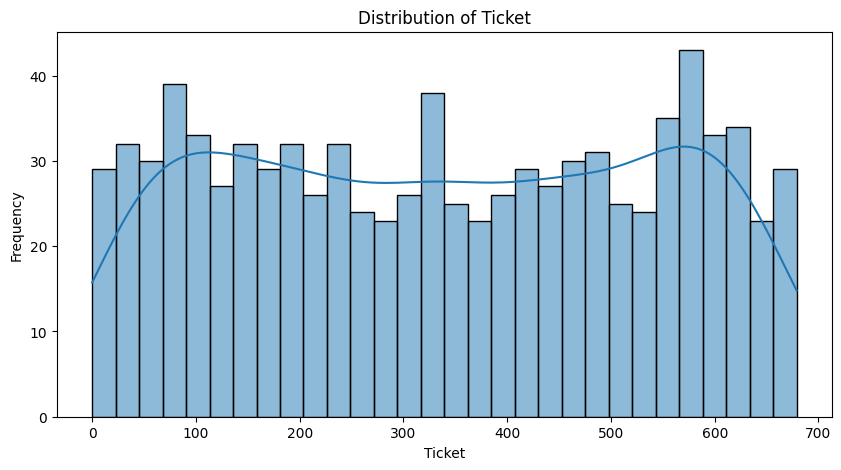

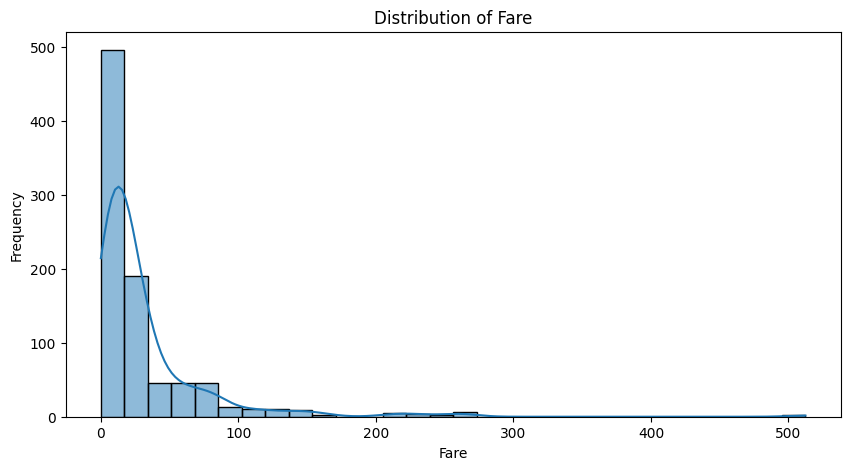

In [60]:
for col in continuous_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:
* Observing the curve distribution for continuous_col, we can see that no curve is normally distributed(No bell shaped curve).
* This curve nature suggests us to use IQR method if there's any outlier in any of the column within continuous_col.

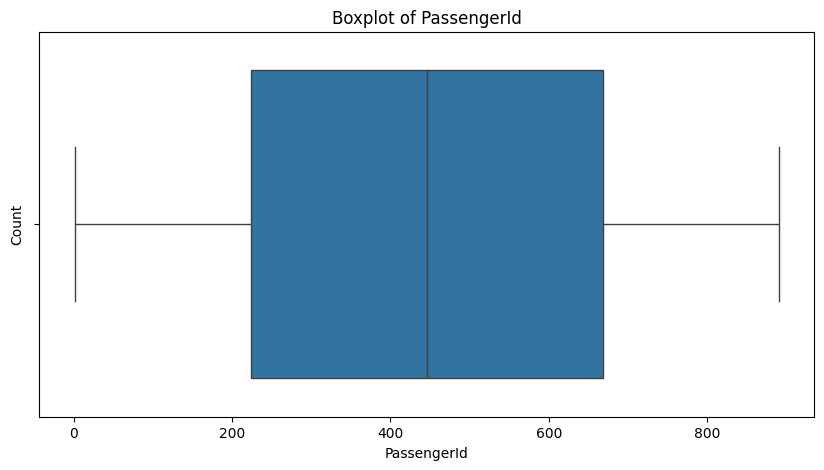

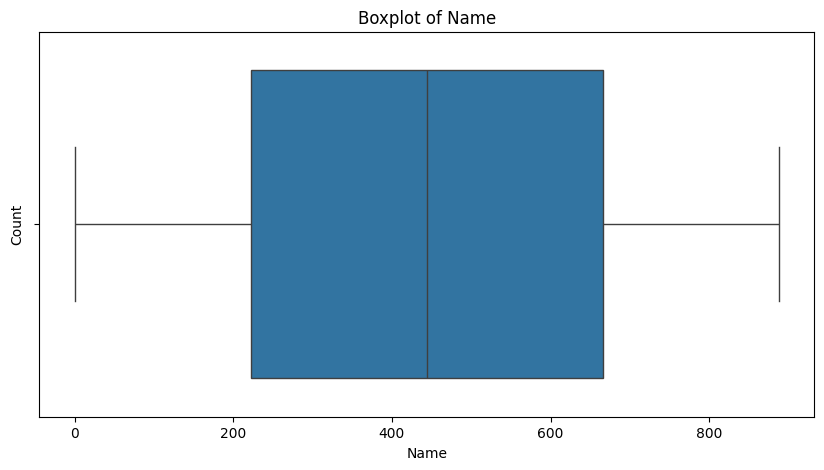

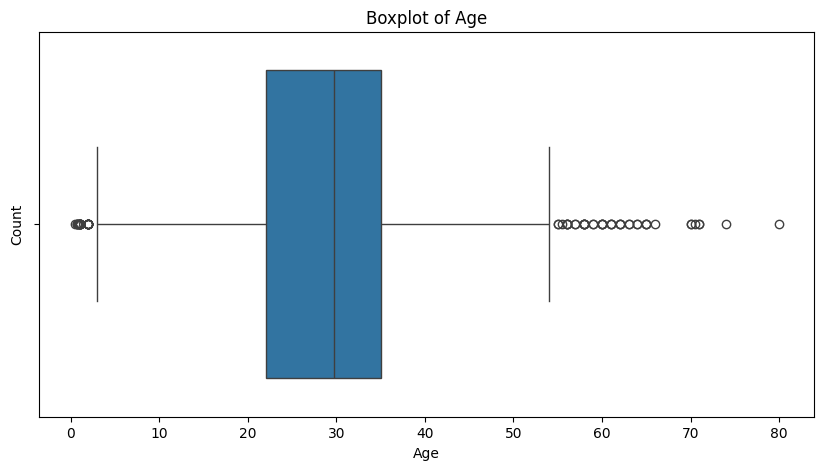

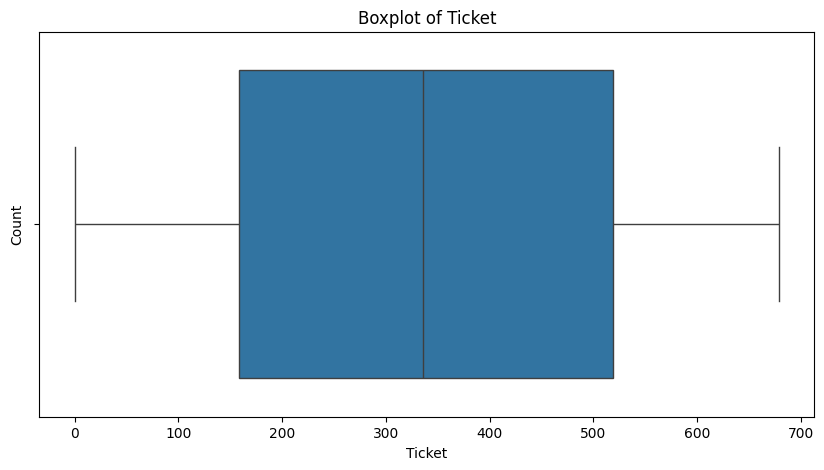

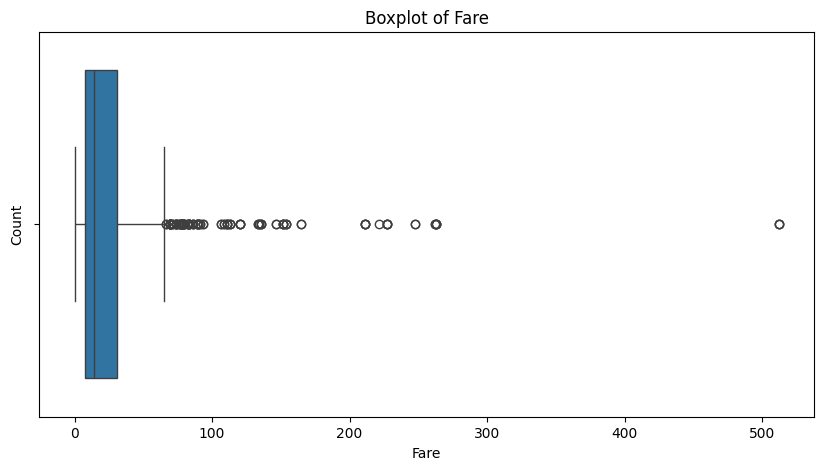

In [61]:
for col in continuous_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}') 
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Insights:
* The Boxplot of numerical columns like 'Age' and 'Fare' showed outliers which should be removed.

#### 7.1.1 Removing Outliers in Continuous Column

In [62]:
continuous_columns = ['Age', 'Fare']
df_cleaned = data.copy()
def replace_outliers(df, column):
    #Step-1: Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    #Step-2: Calculate IQR
    IQR = Q3 - Q1
    #Step-3: Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Step-4: Replace outliers below lower bound with Q1
    data[column]= data[column].apply(lambda x: Q1 if x < lower_bound else x)
    #Step-5: Replace outliers above upper bound with Q3
    data[column]= data[column].apply(lambda x: Q3 if x > upper_bound else x)
    return data

#For removing outliers of Multiple columns
for col in continuous_columns:
    df_cleaned = replace_outliers(df_cleaned, col)

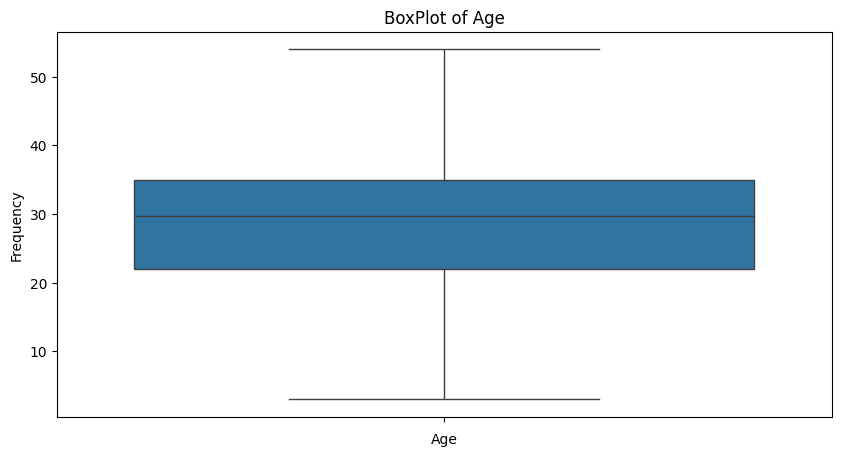

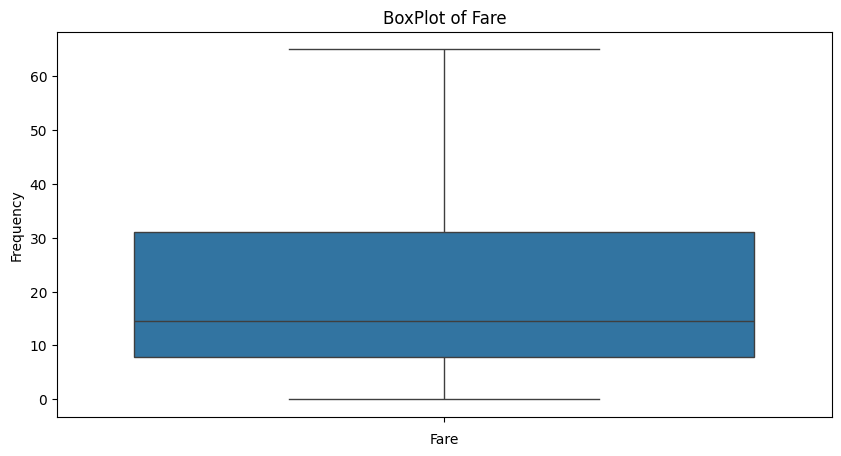

In [63]:
# After replacing outliers, let's visualize the distributions again
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df_cleaned[col])
    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:
* Using IQR method, we successfully removed the outliers in the numerical columns like 'Age' and 'Fare'.

### 7.2 Checking Outliers in Categorical Columns

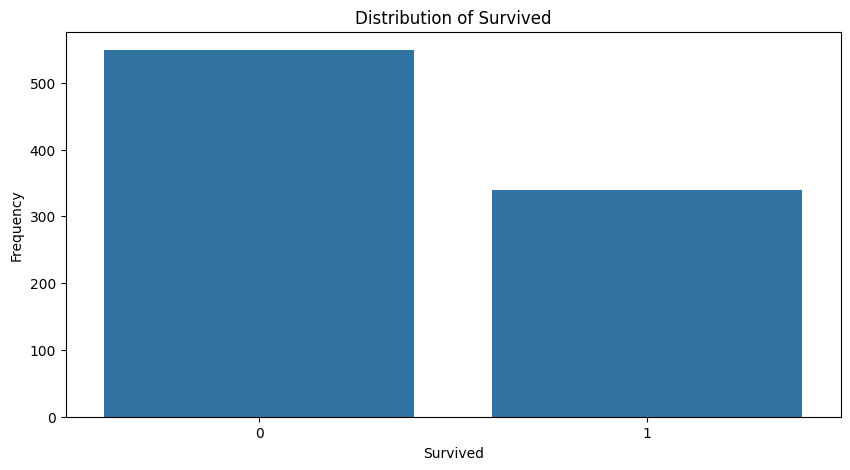

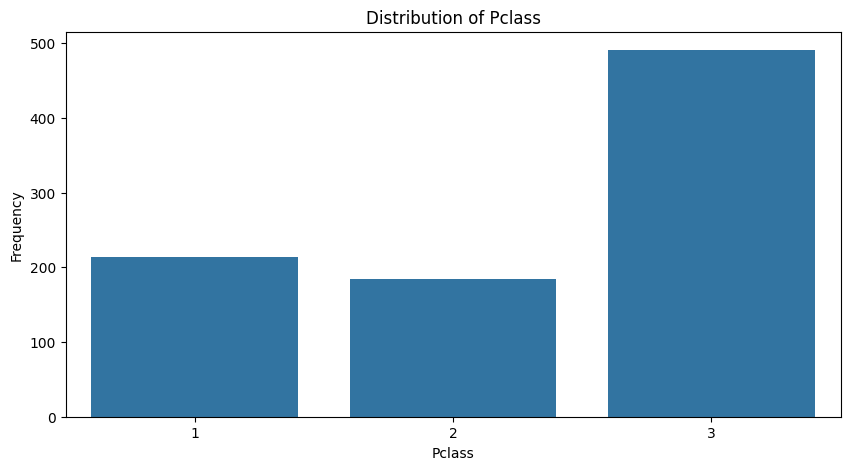

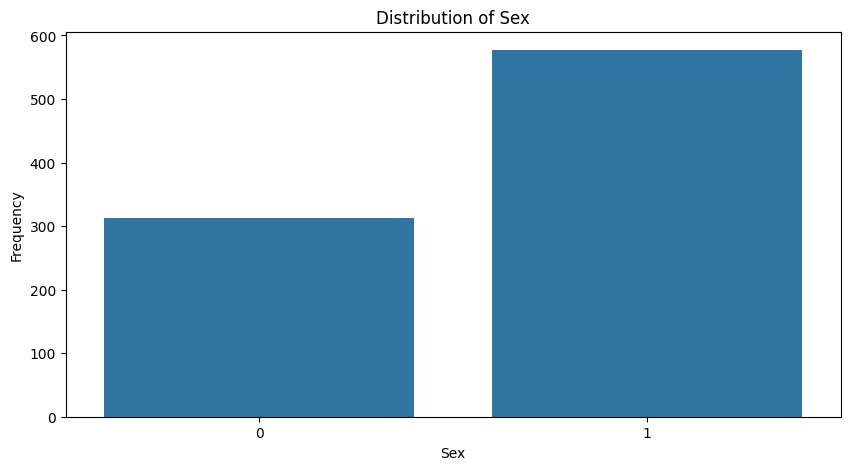

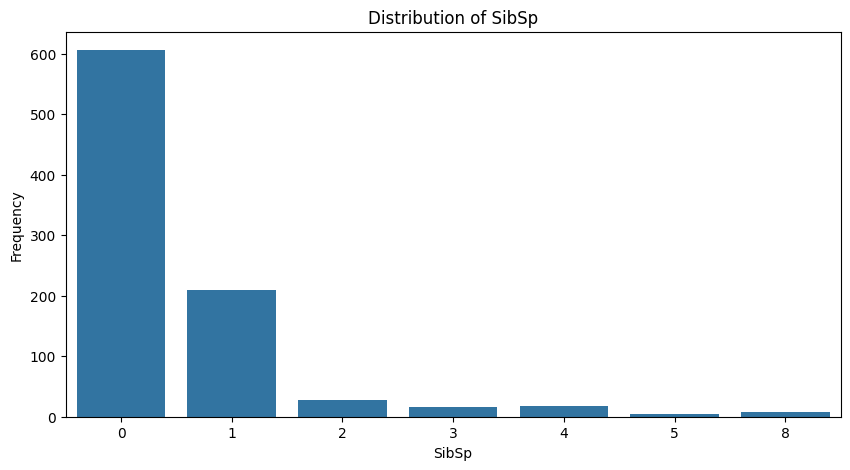

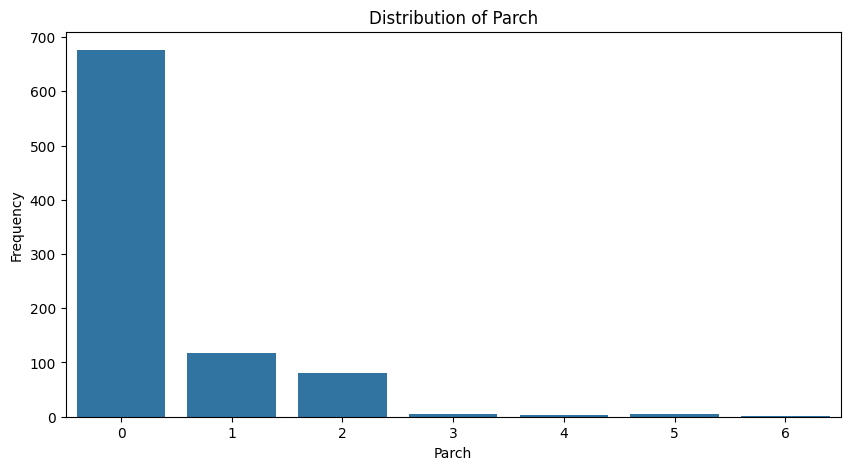

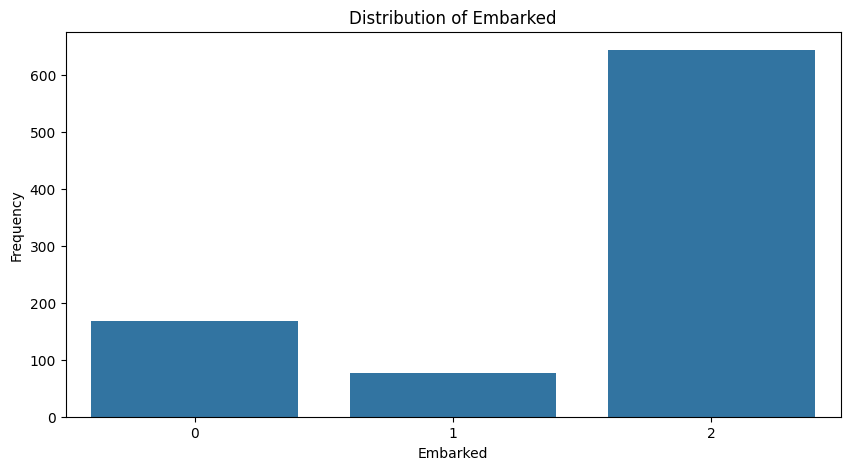

In [64]:
for col in categorical_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

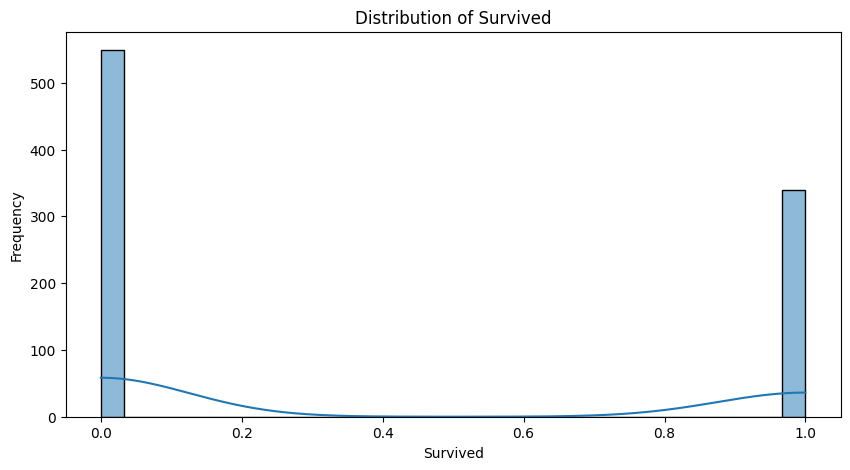

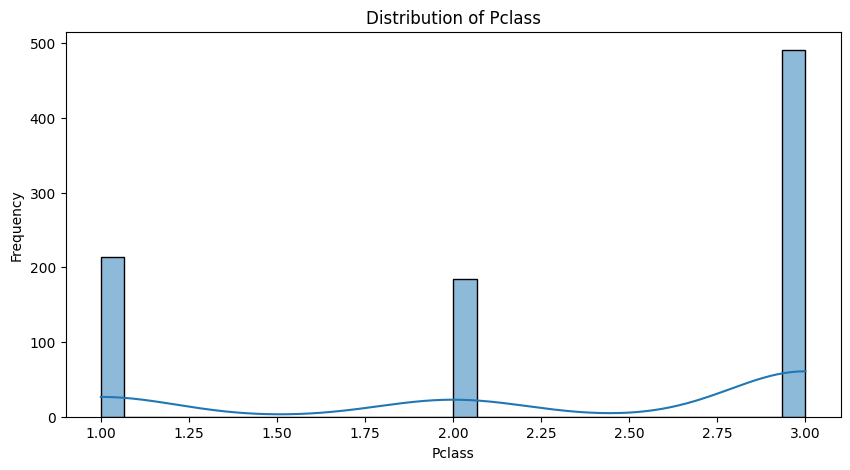

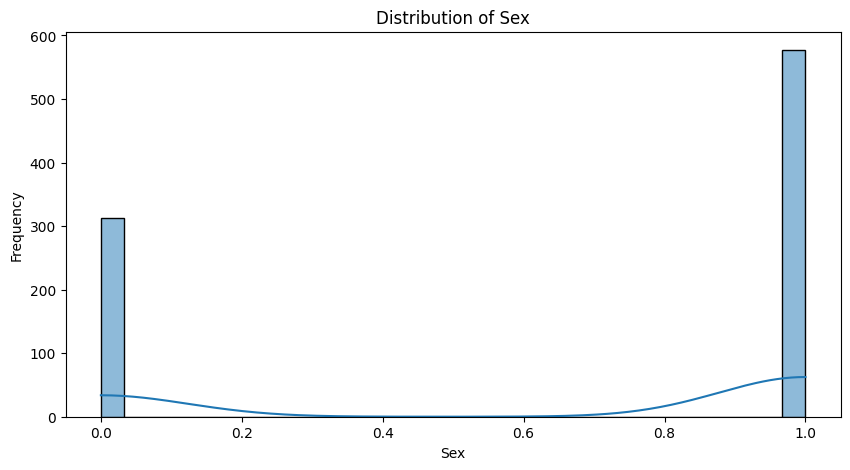

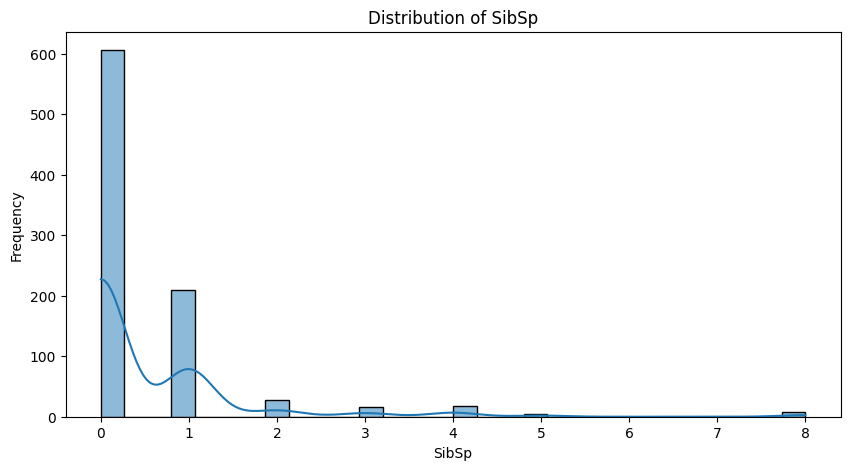

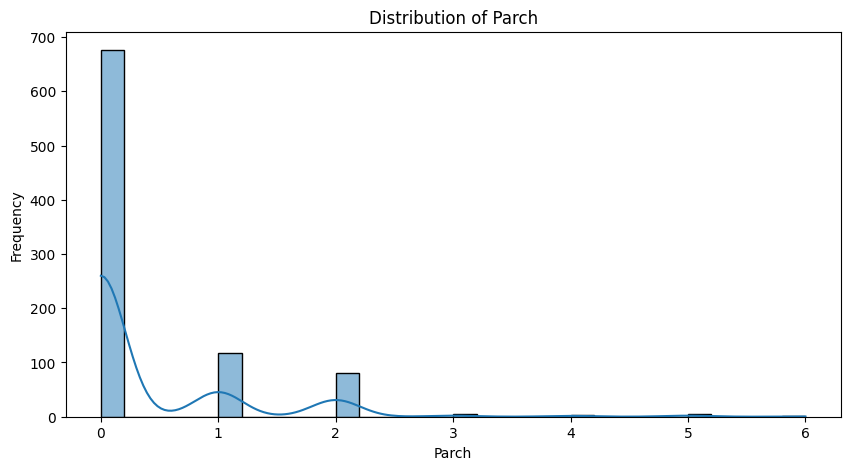

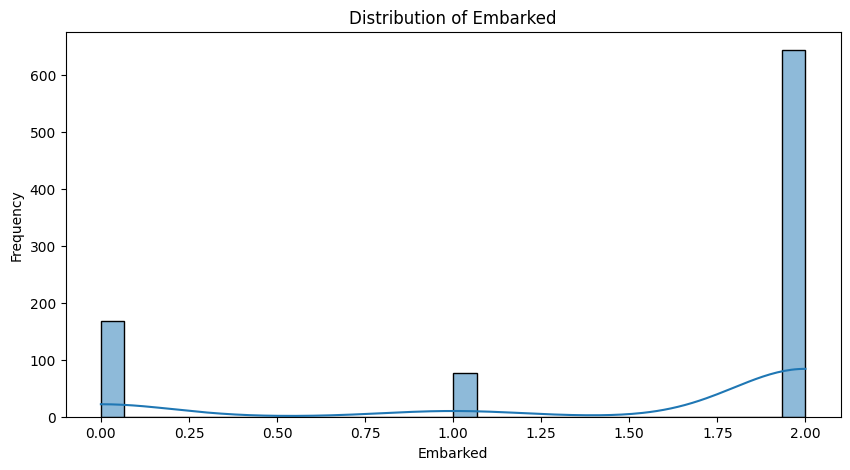

In [65]:
for col in categorical_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:
* Observing the curve distribution for categorical_col, we can see that no curve is normally distributed(No bell shaped curve).
* This curve nature suggests us to use IQR method if there's any outlier in any of the column within categorical_col.

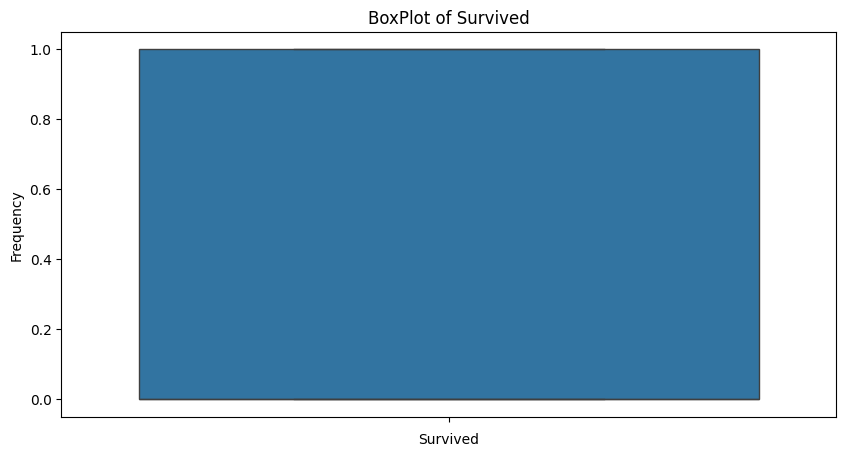

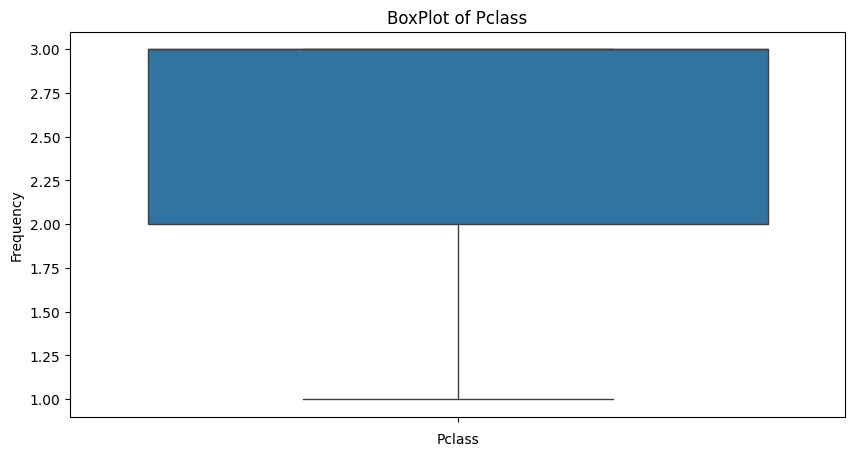

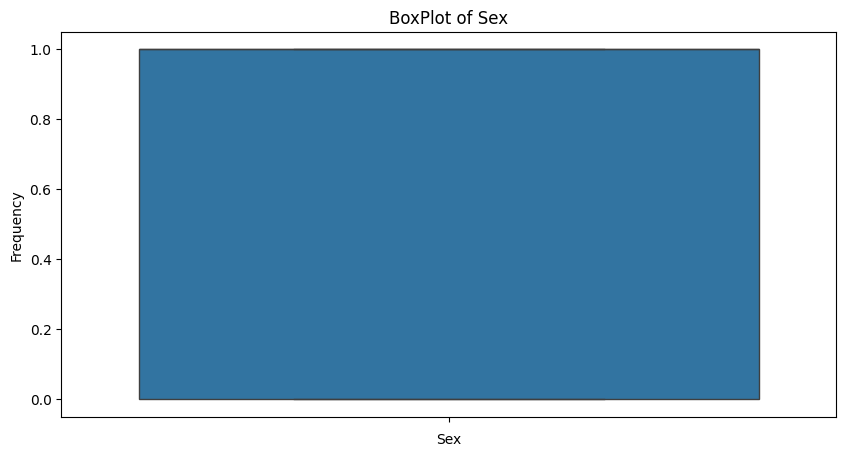

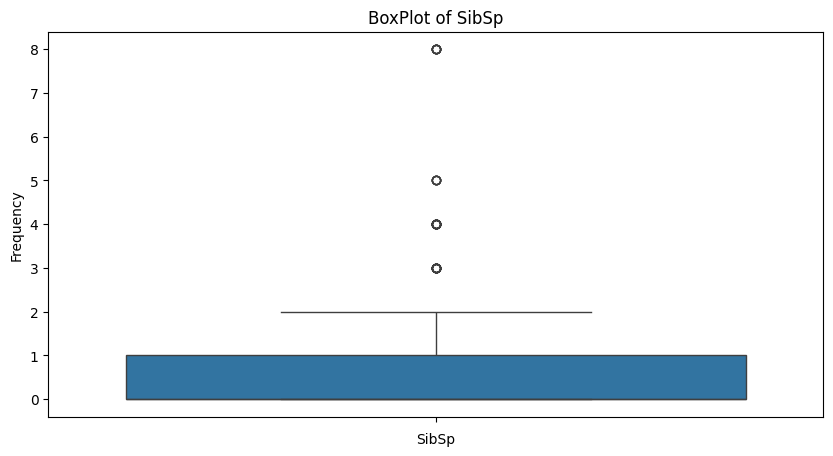

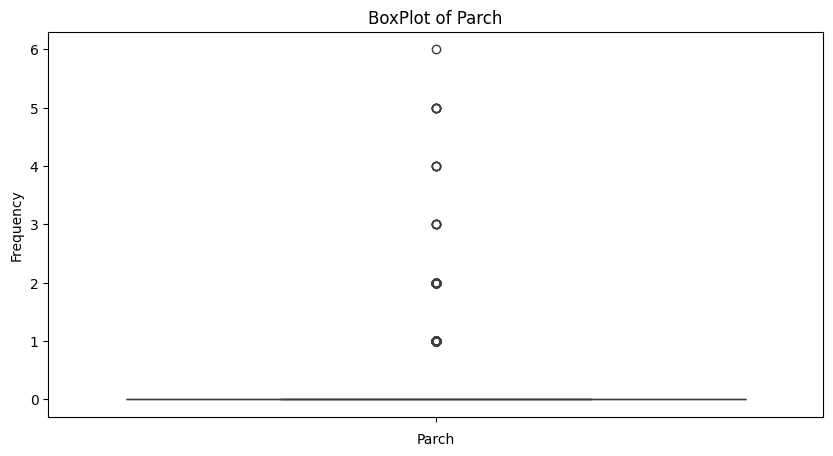

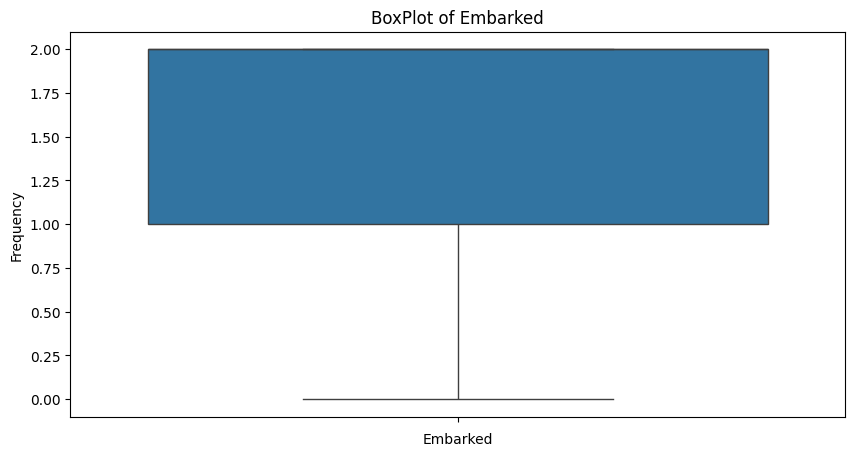

In [66]:
for col in categorical_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:
* Presence of Outliers in the columns like 'SibSp' and 'Parch'

#### 7.2.1 Removing Outliers in Categorical Columns

In [67]:
categorical_columns = ['Parch', 'SibSp']

df_cleaned = data.copy()
def replace_outliers(df, column):
    # Step-1: Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Step-2: Calculate IQR
    IQR = Q3 - Q1
    # Step-3: Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Step-4: Replace outliers below lower bound with Q1
    df[column] = df[column].apply(lambda x: Q1 if x < lower_bound else x)
    # Step-5: Replace outliers above upper bound with Q3
    df[column] = df[column].apply(lambda x: Q3 if x > upper_bound else x)
    return df

# For removing outliers of Multiple columns
for col in categorical_columns:
    df_cleaned = replace_outliers(df_cleaned, col)

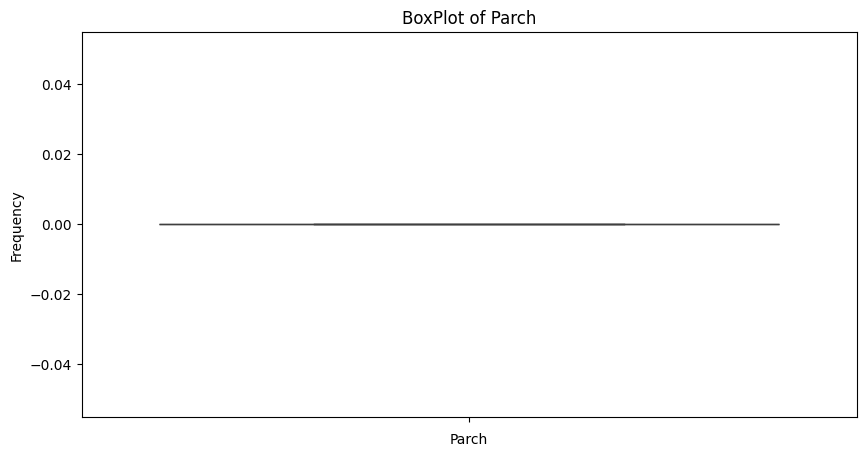

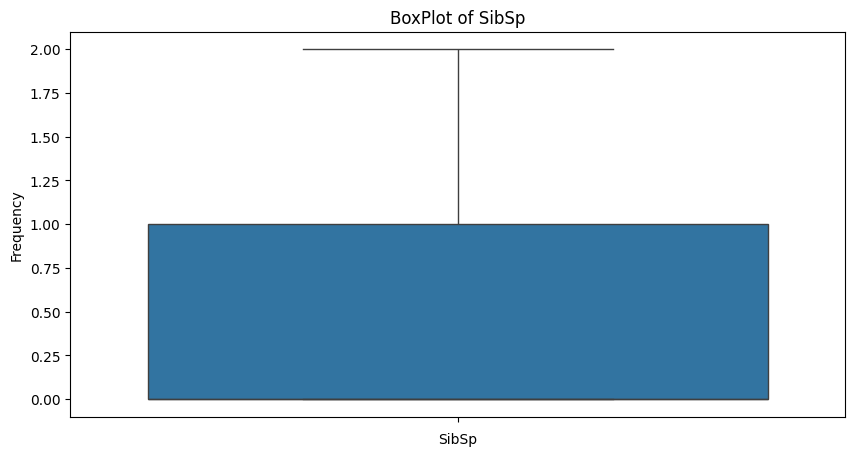

In [68]:
# After replacing outliers, let's visualize the distributions again
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df_cleaned[col])
    plt.title(f'BoxPlot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Insights:
* The outliers in the categorical columns like 'Parch' and 'SibSp' are successfully removed.

# 8. Feature Selection

### 8.1 Chi Square Test For Feature Significance

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

a=data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
b=data['Survived']
chi2_selector = SelectKBest(chi2, k='all')
x_new = chi2_selector.fit_transform(a, b)
p_values = chi2_selector.pvalues_
p_values_df=pd.DataFrame({
    'Feature': a.columns,
    'P-value': p_values
})

In [70]:
p_values_df.sort_values(by='P-value').reset_index(drop=True)

,Feature,P-value
0,Sex,1.108034e-21
1,Pclass,4.029368e-08
2,Embarked,1.225432e-03
3,Parch,1.227426e-03
4,SibSp,1.220208e-01


Insights:

Since p-values<0.05, the features like Sex, Pclass, Embarked, Parch and SibSp are satistically significant.

# 9. Feature Scaling

### 9.1 Separating Independent (x) and Target (y) Variables

In [71]:
#Indepent Variable/ Input Features
x=data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare', 'Ticket']]

In [72]:
#Target Variable/ Output Feature
y=data['Survived']

### 9.2 Normalization of Feature Data Using Standard Scalar

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

# 10. Train Test Split 

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
x_train

array([[-1.57221121, -1.35991138, -0.47519908, ..., -0.70006822,
         0.85643934, -1.50856006],
       [ 0.82520863, -1.35991138,  0.43135024, ...,  0.07368054,
        -0.37705716, -0.72997957],
       [ 0.82520863,  0.73534203, -0.47519908, ...,  0.30491546,
        -0.86381183,  1.62572552],
       ...,
       [-1.57221121, -1.35991138, -0.47519908, ...,  1.91288935,
         0.47840902, -1.25402413],
       [ 0.82520863, -1.35991138,  1.33789956, ..., -0.80056659,
         1.10804704,  1.68062543],
       [ 0.82520863,  0.73534203, -0.47519908, ...,  0.40541383,
        -0.80944966,  0.82718142]])

In [76]:
x_test

array([[ 0.82520863,  0.73534203, -0.47519908, ..., -0.09707801,
        -0.86909   ,  0.00368282],
       [-1.57221121, -1.35991138,  0.43135024, ..., -1.50405517,
         0.85643934, -1.52852366],
       [ 0.82520863, -1.35991138,  0.43135024, ..., -1.50405517,
        -0.61655042, -0.76491587],
       ...,
       [ 0.82520863, -1.35991138,  0.43135024, ...,  0.90790567,
         0.88532763, -0.05121708],
       [ 0.82520863, -1.35991138,  2.24444888, ...,  0.40541383,
        -0.27299967, -0.46047093],
       [ 0.82520863, -1.35991138,  0.43135024, ..., -2.50903885,
        -0.20963181,  1.38117139]])

# 11. Model Building and Training

### 11.1 Import The Models

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Insights: 

* Target varaible is categorical. So, we use Classification method like Logistic Regression, RandomForest Classifier, and so on.

### 11.2 Train The Model

In [78]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [79]:
#RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# 12. Predicting The Test Set Result

### 12.1 Prediction

In [80]:
predictions_lr = lr.predict(x_test)
predictions_rf = rf.predict(x_test)

### 12.2 Compare the Test Data with Predicted Data

In [81]:
df= pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression Predictions': predictions_lr,
    'Random Forest Predictions': predictions_rf
})

In [82]:
df

,Actual,Logistic Regression Predictions,Random Forest Predictions
281,0,0,0
435,1,1,1
39,1,1,1
418,0,0,0
585,1,1,1
...,...,...,...
433,0,0,0
807,0,1,1
25,1,0,0
85,1,0,0


# 13. Model Evaluation

Insights: 
* For CLassification problem, we use Confusion Matrix, Precision, Recall, F1 score, accuracy for model evaluation

### 13.1 Confusion Matrix For Logistic Regression

Confusion Matrix for Logistic Regression:
 [[84 25]
 [16 53]]


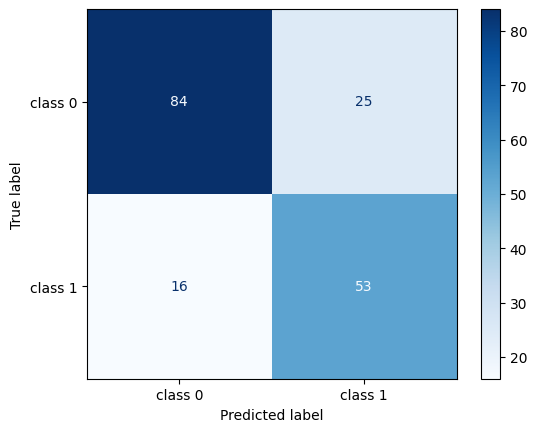

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Calculate confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test, predictions_lr)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)

#Visualize confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['class 0', 'class 1'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.show()

Insights: 

* If predicted= actual --> True, else --> False

* if predicted value is: 0= Negative and 1= Positive

* True Negative, TN=84 ; False Positive, FP=25 

* False Negative, FN=16 ; True Positive, TP=53

#### 13.1.1 Calculation of Precision, Accuracy, F1-score and Recall Score For Logistic Regression

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision= precision_score(y_test, predictions_lr)
recall_score= recall_score(y_test, predictions_lr)
accuracy_score= accuracy_score(y_test, predictions_lr)
f1_score= f1_score(y_test, predictions_lr)
print("Logistic Regression Performance Metrics:")
print(f"Precision: {precision:.2f}")   
print(f"Recall: {recall_score:.2f}")
print(f"Accuracy: {accuracy_score:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Logistic Regression Performance Metrics:
Precision: 0.68
Recall: 0.77
Accuracy: 0.77
F1 Score: 0.72


### 13.2 Confusion Matrix For RandomForest Classifier

Confusion Matrix for Random Forest:
 [[91 18]
 [21 48]]


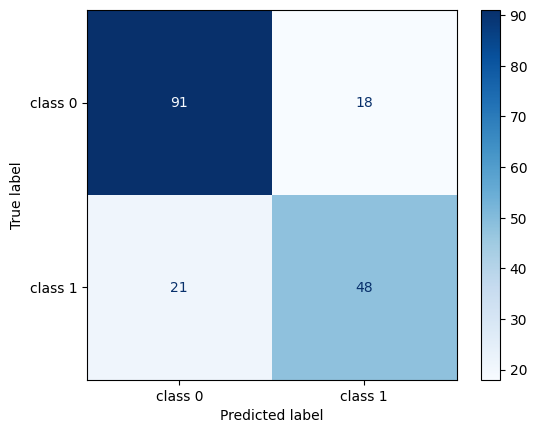

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

#Visualize confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['class 0', 'class 1'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

Insights: 

* True Negative, TN=91 ; False Positive, FP=18

* False Negative, FN=20 ; True Positive, TP=49

#### 13.2.1 Calculation of Precision, Recall Score, Accuracy and F1 Score For RandomForest Classifier

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision= precision_score(y_test, predictions_rf)
recall_score= recall_score(y_test, predictions_rf)
accuracy_score= accuracy_score(y_test, predictions_rf)
f1_score= f1_score(y_test, predictions_rf)
print("Random Forest Classifier Metrics:")
print(f"Precision: {precision:.2f}")   
print(f"Recall: {recall_score:.2f}")
print(f"Accuracy: {accuracy_score:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Random Forest Classifier Metrics:
Precision: 0.73
Recall: 0.70
Accuracy: 0.78
F1 Score: 0.71


Insights:
* Oncomparing the precision, recall, accuracy and F1 score, its better to use RandomForest Classifier to predict the target variable- 'Survived'.

# 14. Save the Model

In [87]:
import joblib
joblib.dump(rf, 'random_forest_model_titanic')

['random_forest_model_titanic']

# 15. Load the Model

In [88]:
model=joblib.load('random_forest_model_titanic')

# 16. Predict Using the Loaded Model

### 16.1 Predict Using the Loaded Model

In [89]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

### 16.2 Save and Load the Data after cleaning (Optional)

In [90]:
# Save the cleaned data to a new CSV file
data.to_csv('titanic_data_cleaned.csv', index=False)

In [91]:
#Load the cleaned data
cleaned_data = pd.read_csv('titanic_data_cleaned.csv')
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareGroup,FamilySize,Alone,TravelAlone,Title
0,1,0,3,108,1,22.0,1,0,522,7.250,2,Young,Low,1,0,With Family,Mr
1,2,1,1,190,0,38.0,1,0,595,31.000,0,Middle-aged,Normal,1,0,With Family,Mrs
2,3,1,3,353,0,26.0,0,0,668,7.925,2,Young,Low,0,1,Alone,Miss
3,4,1,1,272,0,35.0,1,0,48,53.100,2,Middle-aged,Normal,1,0,With Family,Mrs
4,5,0,3,15,1,35.0,0,0,471,8.050,2,Middle-aged,Normal,0,1,Alone,Mr


### 16.3 Creating DataFrame for the Input Data

In [95]:
# Value enter by user  in rows
Pclass = input("Enter the value for Pclass (1 to 3): ")
Sex = input("Enter the value for Sex (0 for female and 1 for male): ")
SibSp = input("Enter the value for Sibsp (0 to 8): ")
Parch = input("Enter the value for Parch (0 to 6): ")
Embarked = input("Enter the value for Embarked (0 to 2): ")
Age = input("Enter the Age: ")
Fare = input("Enter the Fare:")
Ticket = input("Enter the value for Ticket: ")

# Create a DataFrame for the input data
df = pd.DataFrame({
    'Pclass': [Pclass],
    'Sex': [Sex],
    'SibSp': [SibSp],
    'Parch': [Parch],
    'Embarked': [Embarked],
    'Age': [Age],
    'Fare': [Fare],
    'Ticket': [Ticket]})
df

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare,Ticket
0,2,1,5,5,1,45,18,150


### 16..4 Predicting The Survival Status

In [93]:
from sklearn.preprocessing import StandardScaler
scaled_input = scaler.transform(df)
result = model.predict(scaled_input)
print("Survived" if result[0] == 1 else "Not Survived")

Survived
